In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
def load_amazon_data(data_path="D:/2.0/Project_2.0/Amazon_products_BIG/notebook/data"):
    csv_path = os.path.join(data_path, "amazon_product.csv")
    return pd.read_csv(csv_path)

#https://www.kaggle.com/datasets/spypsc07/amazon-products

In [3]:
amazon_data_original = load_amazon_data()
amazon_data = amazon_data_original.copy()
#amazon_data.head()

In [4]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   64 non-null     int64  
 1   asin                         64 non-null     object 
 2   product_title                64 non-null     object 
 3   product_price                64 non-null     object 
 4   product_original_price       27 non-null     object 
 5   currency                     64 non-null     object 
 6   product_star_rating          54 non-null     float64
 7   product_num_ratings          64 non-null     int64  
 8   product_url                  64 non-null     object 
 9   product_photo                64 non-null     object 
 10  product_num_offers           64 non-null     int64  
 11  product_minimum_offer_price  64 non-null     object 
 12  is_best_seller               64 non-null     bool   
 13  is_amazon_choice      

In [5]:
# Removing a dummy colum which represents serial number
amazon_data = amazon_data.drop('Unnamed: 0', axis =1)

We can see that the important features like product_pric , product_original_price, product_minimum_offer_price and sales_volume are in Object(string) data types. We need to convert them to float for calculations.

In [6]:
# Remove the dollar symbol and convert the column to numeric by replacing the $ wil a space and converting to a float data type
amazon_data['product_price'] = amazon_data['product_price'].replace({'\$': ''}, regex=True).astype(float)
amazon_data['product_original_price'] = amazon_data['product_original_price'].replace({'\$': ''}, regex=True).astype(float)
amazon_data['product_minimum_offer_price'] = amazon_data['product_minimum_offer_price'].replace({'\$': ''}, regex=True).astype(float)

In [7]:
amazon_data[['product_price', 'product_original_price','product_minimum_offer_price']].isnull().sum()

product_price                   0
product_original_price         37
product_minimum_offer_price     0
dtype: int64

In [8]:
# Replacing missing values in product_original_price with product_price cancelling the discount as its not mentioned
amazon_data['product_original_price'].fillna(amazon_data['product_price'], inplace=True)

#amazon_data[['product_price', 'product_original_price']].isnull().sum()
#amazon_data.head(5)


In [9]:
# Drop rows that don't match the "K+" sales format or have 'nan'
#amazon_data = amazon_data[amazon_data['sales_volume'].str.contains(r'\d+K\+', na=False)]

# Extract the numerical part (e.g., '6K') and convert to a numeric type
amazon_data['sales_volume_numeric'] = amazon_data['sales_volume'].str.extract(r'(\d+)').astype(float) * 1000

# Display the cleaned data
amazon_data[['sales_volume', 'sales_volume_numeric']].head()


,sales_volume,sales_volume_numeric
0,6K+ bought in past month,6000.0
1,3K+ bought in past month,3000.0
2,2K+ bought in past month,2000.0
3,10K+ bought in past month,10000.0
4,3K+ bought in past month,3000.0


In [10]:
#amazon_data['sales_volume_numeric'].unique()

Now that we have converted the data types of product_pric , product_original_price columns, lets check if all the amounts are in the same currency and also take care of missing values.

We can see that all the currency are in USD

In [11]:
#amazon_data.info()

In [12]:
# Check the unique values in the currency column
print(amazon_data['currency'].unique())

['USD']


In [13]:
amazon_data.isnull().sum()

asin                            0
product_title                   0
product_price                   0
product_original_price          0
currency                        0
product_star_rating            10
product_num_ratings             0
product_url                     0
product_photo                   0
product_num_offers              0
product_minimum_offer_price     0
is_best_seller                  0
is_amazon_choice                0
is_prime                        0
climate_pledge_friendly         0
sales_volume                    3
delivery                        1
has_variations                  0
product_availability           63
unit_price                     59
unit_count                     59
sales_volume_numeric           17
dtype: int64

In [14]:
# Find the products with a price of 0
free_products = amazon_data[amazon_data['product_price'] == 0]

# Display the details of the free products
#print(free_products)

We can see that there are lot of free items in the product_price, product_original_price so can create another column for price catogories for better analysis	

In [15]:
amazon_data['price_category'] = pd.qcut(amazon_data['product_price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
#amazon_data.head()

## Redundant Columns-

product_num_offers:
There are few offers per product (mean 4.86, with a range from 1 to 34).Most products seem to have just a few offers (25th and 50th percentiles both indicate just 1 offer). 

unit_count:
The values have a large spread (from 0 to 60), with a mean of 15.2 and a standard deviation of 25.39. However, with such a wide range and high variance, it's unclear if this metric correlates with other attributes like price or sales.This column could be useful in specific product categories, but for a general analysis, it might not offer much value unless tied to specific product types.

Product_url, product_photo, Delivery data nd ha_veriations are also not useful at this post in our analysis.


product_availability           63, 
unit_price                     59, 
unit_count                     59, 
Currency As all the currency are in USD
Product_url and product_photos are also not useful at this post in our analysis.

Also from the above list we can there are a lot of missing values, So we can trunicate these features for bettr analysis.

In [16]:
#Removing product_num_offers and unit_count as it is not very useful
columns_to_remove = ['product_url','product_photo','currency','product_num_offers','unit_count','product_availability','unit_price']
amazon_data = amazon_data.drop(columns=columns_to_remove)

In [17]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   asin                         64 non-null     object  
 1   product_title                64 non-null     object  
 2   product_price                64 non-null     float64 
 3   product_original_price       64 non-null     float64 
 4   product_star_rating          54 non-null     float64 
 5   product_num_ratings          64 non-null     int64   
 6   product_minimum_offer_price  64 non-null     float64 
 7   is_best_seller               64 non-null     bool    
 8   is_amazon_choice             64 non-null     bool    
 9   is_prime                     64 non-null     bool    
 10  climate_pledge_friendly      64 non-null     bool    
 11  sales_volume                 61 non-null     object  
 12  delivery                     63 non-null     object  
 13  has_var

In [18]:
amazon_data.head(5)

,asin,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,sales_volume_numeric,price_category
0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,4.0,2929,64.89,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,6000.0,Very High
1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,158.00,4.2,135,145.87,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,3000.0,Very High
2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,49.88,3.9,205,49.88,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,2000.0,High
3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,499.00,4.3,2248,289.99,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,10000.0,Very High
4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,199.99,4.1,423,150.09,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,3000.0,Very High


In [19]:
amazon_data.describe()

,product_price,product_original_price,product_star_rating,product_num_ratings,product_minimum_offer_price,sales_volume_numeric
count,64.000000,64.000000,54.000000,6.400000e+01,64.000000,4.700000e+01
mean,55.983906,69.894844,4.244444,5.210164e+04,48.813125,1.294043e+05
std,91.710499,122.310371,0.558187,1.576855e+05,76.338285,3.435657e+05
min,0.000000,0.000000,1.800000,0.000000e+00,0.000000,1.000000e+03
25%,1.915000,10.662500,4.100000,4.775000e+01,1.915000,4.000000e+03
50%,23.085000,28.490000,4.400000,9.675000e+02,21.680000,1.100000e+04
75%,61.812500,67.957500,4.600000,1.384625e+04,56.990000,4.500000e+04
max,499.000000,699.000000,4.800000,1.015448e+06,409.990000,2.023000e+06


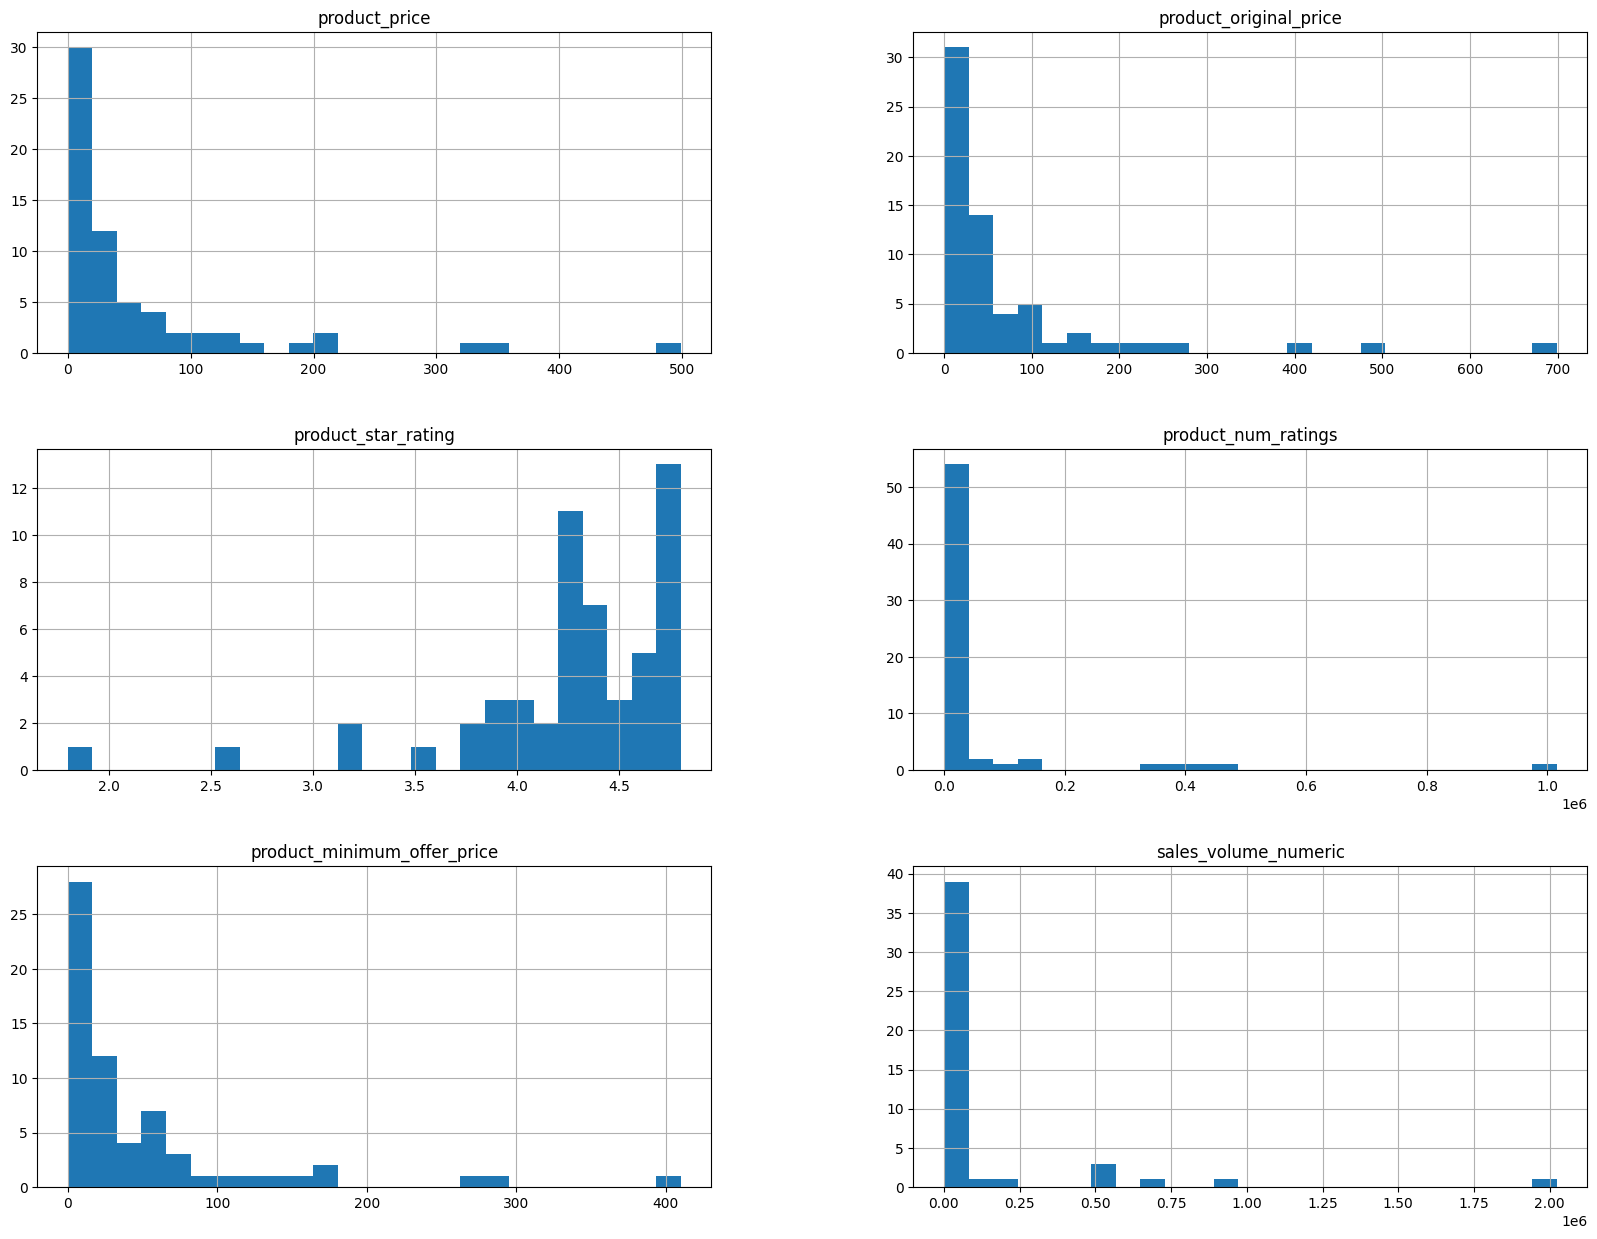

In [20]:
amazon_data.hist(bins=25, figsize=(20,15))
plt.show()

Flagging the high-priced products or unusually high sales volumes as influential points but keep them in the dataset for further analysis.

In [21]:
# Flag high-priced products or unusually high sales volumes as influential points
# Defining thresholds based on the 95th percentile for both price and sales
high_price_threshold = amazon_data['product_price'].quantile(0.95)
high_sales_threshold = amazon_data['sales_volume_numeric'].quantile(0.95)

# Flag rows where price or sales are above the threshold
amazon_data['high_price_flag'] = amazon_data['product_price'] > high_price_threshold
amazon_data['high_sales_flag'] = amazon_data['sales_volume_numeric'] > high_sales_threshold


In [22]:
amazon_data.head()

,asin,product_title,product_price,product_original_price,product_star_rating,product_num_ratings,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,has_variations,sales_volume_numeric,price_category,high_price_flag,high_sales_flag
0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,4.0,2929,64.89,False,False,True,False,6K+ bought in past month,"FREE delivery Tue, Aug 6",True,6000.0,Very High,False,False
1,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,158.00,4.2,135,145.87,False,False,True,False,3K+ bought in past month,"FREE delivery Wed, Aug 7 Only 7 left in stock ...",False,3000.0,Very High,False,False
2,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,49.88,3.9,205,49.88,False,False,True,False,2K+ bought in past month,"FREE delivery Tue, Aug 6",False,2000.0,High,False,False
3,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,499.00,4.3,2248,289.99,False,False,False,False,10K+ bought in past month,FREE delivery Aug 6 - 8,True,10000.0,Very High,True,False
4,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,199.99,4.1,423,150.09,False,False,True,True,3K+ bought in past month,"FREE delivery Tue, Aug 6",True,3000.0,Very High,False,False


## Analyzing Numericals data to see if there are strong correlations with these features!

In [23]:
numeric_columns = amazon_data.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['product_price', 'product_original_price', 'product_star_rating',
       'product_num_ratings', 'product_minimum_offer_price',
       'sales_volume_numeric'],
      dtype='object')


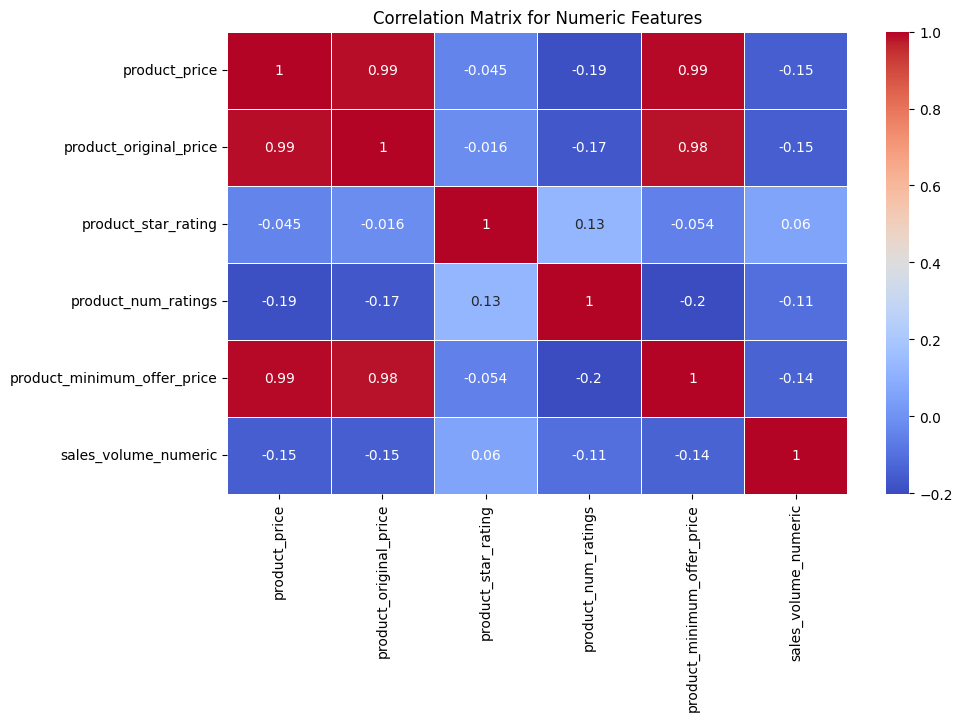

In [24]:
corr_matrix1 = amazon_data[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

We can see that there are no major correlations between these features, there are only moderate and weak correlations. Lets try and analyze the catagorical datasets.

## Analyzing cateogorical data

In [25]:
# Check the data types of each column
selected_features = amazon_data.select_dtypes(include=['object', 'bool']).columns
selected_features = selected_features.drop('asin')
print(selected_features)

Index(['product_title', 'is_best_seller', 'is_amazon_choice', 'is_prime',
       'climate_pledge_friendly', 'sales_volume', 'delivery', 'has_variations',
       'high_price_flag', 'high_sales_flag'],
      dtype='object')


Lets see the frequecy of the counts to understand the the counts of each catagory and then plot them in a bar chart for better understanding

In [26]:
# List of categorical_columns for frequency count analysis
categorical_columns = ['is_best_seller', 'is_amazon_choice', 'is_prime',
                     'climate_pledge_friendly', 'high_price_flag', 'high_sales_flag']

# Frequency count for each selected categorical feature
for col in categorical_columns:
    print(f"Frequency counts for {col}:")
    print(amazon_data[col].value_counts())
    print("\n")

Frequency counts for is_best_seller:
is_best_seller
False    40
True     24
Name: count, dtype: int64


Frequency counts for is_amazon_choice:
is_amazon_choice
False    62
True      2
Name: count, dtype: int64


Frequency counts for is_prime:
is_prime
True     40
False    24
Name: count, dtype: int64


Frequency counts for climate_pledge_friendly:
climate_pledge_friendly
False    61
True      3
Name: count, dtype: int64


Frequency counts for high_price_flag:
high_price_flag
False    61
True      3
Name: count, dtype: int64


Frequency counts for high_sales_flag:
high_sales_flag
False    61
True      3
Name: count, dtype: int64




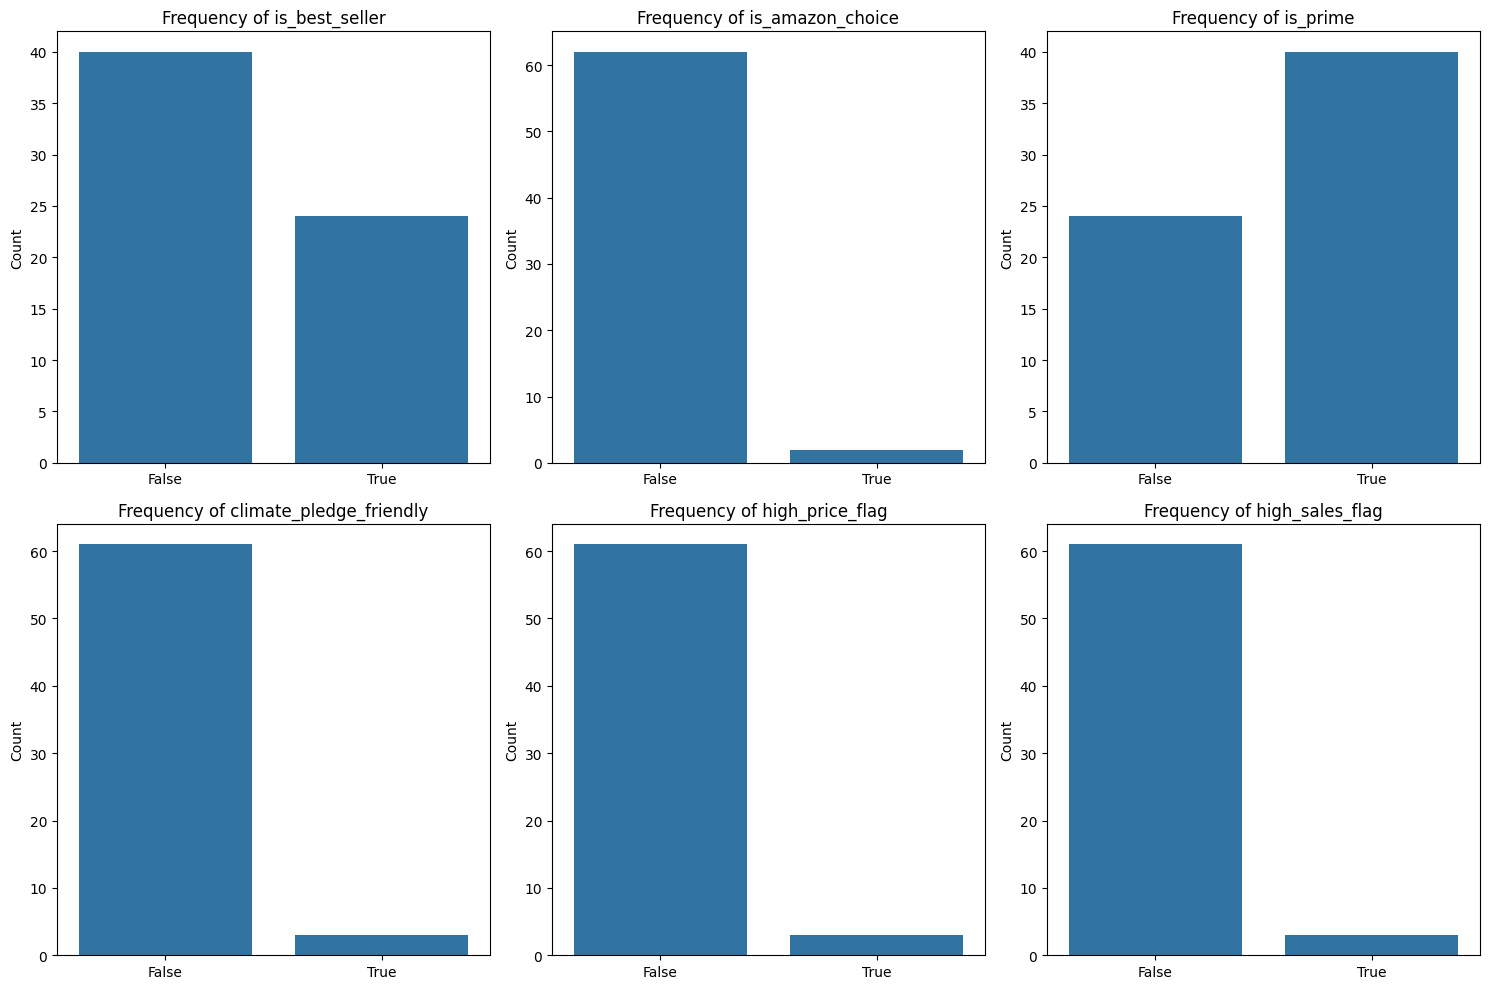

In [27]:
# Set up the grid for subplots
num_features = len(categorical_columns)
cols = 3  # Number of columns in the grid
rows = (num_features // cols) + (num_features % cols)  # Calculate rows needed

# Set figure size to accommodate the grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easier access to subplots
axes = axes.flatten()

# Create bar plots for each categorical feature
for i, col in enumerate(categorical_columns):
    sns.countplot(data=amazon_data, x=col, ax=axes[i])
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Hide any empty subplots (if the number of features is less than the total grid cells)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Lets encode the catagorical data and then draw correlations to see if we can obtain somme trends.

In [28]:
nume = ['product_price', 'product_original_price', 'product_star_rating', 
                   'product_num_ratings', 'product_minimum_offer_price', 'sales_volume_numeric']

categ = ['is_best_seller', 'is_amazon_choice', 'is_prime',
                     'climate_pledge_friendly', 'high_price_flag', 'high_sales_flag']

# Create a new DataFrame with only the relevant columns
amazon_data_selected= amazon_data[nume + categ]


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a column transformer to apply one-hot encoding to the categorical columns
encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categ)], remainder='passthrough')

# Fit and transform the data
X = encoder.fit_transform(amazon_data_selected)

# Convert the one-hot encoded matrix to a pandas DataFrame
amazon_data_selected = pd.DataFrame(X, columns=encoder.get_feature_names_out())

In [30]:
amazon_data_selected.head()

,encoder__is_best_seller_True,encoder__is_amazon_choice_True,encoder__is_prime_True,encoder__climate_pledge_friendly_True,encoder__high_price_flag_True,encoder__high_sales_flag_True,remainder__product_price,remainder__product_original_price,remainder__product_star_rating,remainder__product_num_ratings,remainder__product_minimum_offer_price,remainder__sales_volume_numeric
0,0.0,0.0,1.0,0.0,0.0,0.0,99.99,169.99,4.0,2929.0,64.89,6000.0
1,0.0,0.0,1.0,0.0,0.0,0.0,149.74,158.00,4.2,135.0,145.87,3000.0
2,0.0,0.0,1.0,0.0,0.0,0.0,49.88,49.88,3.9,205.0,49.88,2000.0
3,0.0,0.0,0.0,0.0,1.0,0.0,335.00,499.00,4.3,2248.0,289.99,10000.0
4,0.0,0.0,1.0,1.0,0.0,0.0,199.99,199.99,4.1,423.0,150.09,3000.0


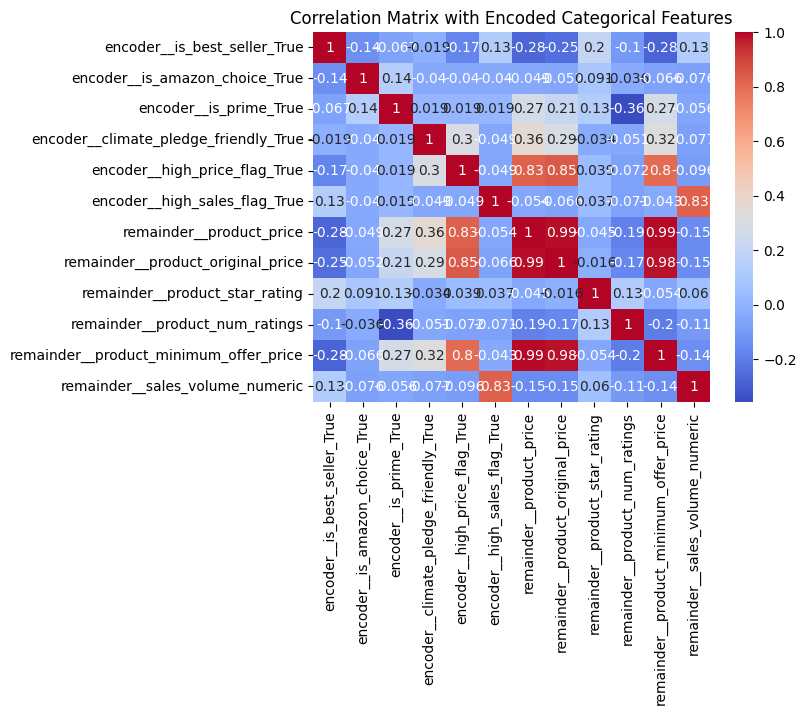

In [31]:
corr_matrix2 = amazon_data_selected.corr()

sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Categorical Features')
plt.show()

# Price Analysis

Comparing the current price to the original price to assess discount levels.

Creating a new dataframe that has the product title and asin for analysis


In [32]:
# Create a new dataframe with the 'asin' and 'product_title' columns from the original 'amazon_data' dataframe
asin_title_df = amazon_data[['asin', 'product_title']]

# Merge the 'asin_title_df' with the 'amazon_data_selected' dataframe
pa_amazon_data = pd.concat([amazon_data_selected, asin_title_df], axis=1)
#merged_df.head()

In [33]:
pa_amazon_data.head()

,encoder__is_best_seller_True,encoder__is_amazon_choice_True,encoder__is_prime_True,encoder__climate_pledge_friendly_True,encoder__high_price_flag_True,encoder__high_sales_flag_True,remainder__product_price,remainder__product_original_price,remainder__product_star_rating,remainder__product_num_ratings,remainder__product_minimum_offer_price,remainder__sales_volume_numeric,asin,product_title
0,0.0,0.0,1.0,0.0,0.0,0.0,99.99,169.99,4.0,2929.0,64.89,6000.0,B0BQ118F2T,Moto G Play 2023 3-Day Battery Unlocked Made f...
1,0.0,0.0,1.0,0.0,0.0,0.0,149.74,158.00,4.2,135.0,145.87,3000.0,B0CTD47P22,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB..."
2,0.0,0.0,1.0,0.0,0.0,0.0,49.88,49.88,3.9,205.0,49.88,2000.0,B0CHH6X6H2,Total by Verizon | Samsung Galaxy A03s | Locke...
3,0.0,0.0,0.0,0.0,1.0,0.0,335.00,499.00,4.3,2248.0,289.99,10000.0,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...
4,0.0,0.0,1.0,1.0,0.0,0.0,199.99,199.99,4.1,423.0,150.09,3000.0,B0CN1QSH8Q,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128..."


In [34]:
# Calculate discount percentage in the main dataframe
pa_amazon_data['discount_percentage'] = ((pa_amazon_data['remainder__product_original_price'] - pa_amazon_data['remainder__product_price']) / pa_amazon_data['remainder__product_original_price']) * 100

# Preview the updated dataframe with the discount percentage
pa_amazon_data[['product_title', 'remainder__product_price', 'remainder__product_original_price', 'discount_percentage']].head()



,product_title,remainder__product_price,remainder__product_original_price,discount_percentage
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,41.178893
1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,158.00,5.227848
2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,49.88,0.000000
3,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,499.00,32.865731
4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,199.99,0.000000


Highest discounted products

In [35]:
title_discount_sorted = pa_amazon_data[['product_title', 'remainder__product_price', 'remainder__product_original_price', 'discount_percentage']].sort_values(by='discount_percentage', ascending=False)
title_discount_sorted.head(10)


,product_title,remainder__product_price,remainder__product_original_price,discount_percentage
48,All the Colors of the Dark,0.00,22.50,100.000000
45,It Ends with Us,0.00,20.24,100.000000
33,The Anxious Generation: How the Great Rewiring...,0.00,20.25,100.000000
31,Atomic Habits: An Easy &amp; Proven Way to Bui...,0.00,18.00,100.000000
60,Swan Song,14.99,30.00,50.033333
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,41.178893
22,Onyx Storm (Deluxe Limited Edition) (The Empyr...,19.78,32.99,40.042437
26,Hillbilly Elegy: A Memoir of a Family and Cult...,11.53,18.99,39.283834
39,Rand McNally Large Scale Road Atlas 2025,19.02,29.99,36.578860
21,The Book of Bill (Gravity Falls),18.09,26.99,32.975176


Categorize Titles by Discount Range

In [36]:
# Define discount ranges
def categorize_discount(discount):
    if discount >= 30:
        return 'High Discount (30% and above)'
    elif 10 <= discount < 30:
        return 'Medium Discount (10% - 30%)'
    else:
        return 'Low Discount (below 10%)'

# Apply the categorization to the dataframe
pa_amazon_data['discount_category'] = pa_amazon_data['discount_percentage'].apply(categorize_discount)

# Preview the results with discount categories
pa_amazon_data[['product_title', 'remainder__product_price', 'remainder__product_original_price', 'discount_percentage' , 'discount_category']].head()


,product_title,remainder__product_price,remainder__product_original_price,discount_percentage,discount_category
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,169.99,41.178893,High Discount (30% and above)
1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,158.00,5.227848,Low Discount (below 10%)
2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,49.88,0.000000,Low Discount (below 10%)
3,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,499.00,32.865731,High Discount (30% and above)
4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,199.99,0.000000,Low Discount (below 10%)


In [37]:
discount_counts = pa_amazon_data['discount_category'].value_counts()

print(discount_counts)

discount_category
Low Discount (below 10%)         40
Medium Discount (10% - 30%)      13
High Discount (30% and above)    11
Name: count, dtype: int64


### Correlation Between Sales Volume and Discount

In [38]:
# Calculate correlation between sales volume and discount percentage
corr_s_d = pa_amazon_data[['discount_percentage', 'remainder__sales_volume_numeric']].corr()

print("Correlation between Sales Volume and Discount Percentage:\n", corr_s_d)


Correlation between Sales Volume and Discount Percentage:
                                  discount_percentage  \
discount_percentage                         1.000000   
remainder__sales_volume_numeric            -0.282608   

                                 remainder__sales_volume_numeric  
discount_percentage                                    -0.282608  
remainder__sales_volume_numeric                         1.000000  
